In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import warnings

warnings. filterwarnings('ignore')
%matplotlib inline

# loading data

In [28]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [38]:
df  = df.drop('Name' , axis='columns')

# Data Visualization

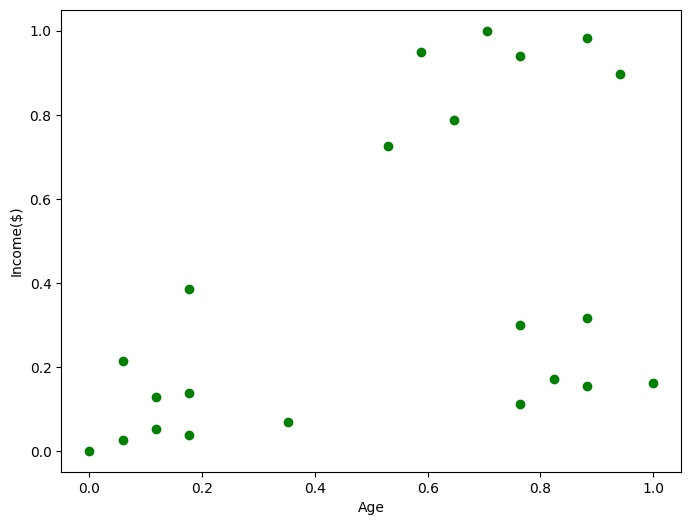

In [66]:
# Create a count plot 
def scatterPlot(df_group ,  x , y ,col ,  mark ):
    plt.figure(figsize=(8, 6))

    plt.scatter(df[x] , df[y] , color = col , marker = mark)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

scatterPlot([df] , "Age"  ,'Income($)' , 'green' , 'o')


# Preprocessing using min max scaler

In [30]:
from sklearn.preprocessing import  MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [39]:
df.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


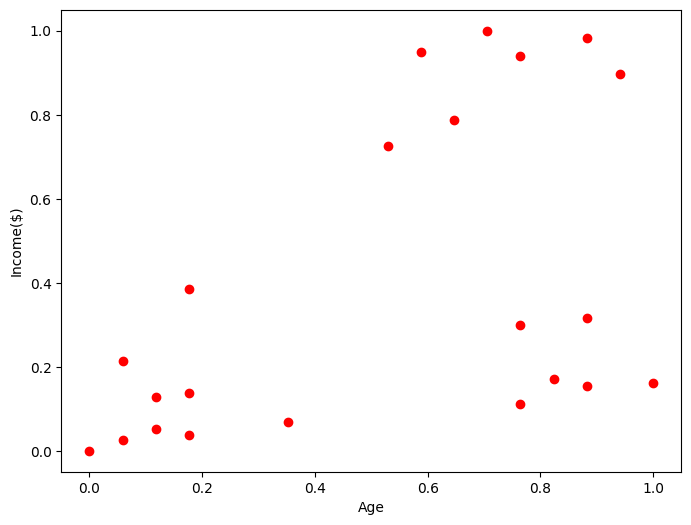

In [32]:
scatterPlot(df , "Age"  ,'Income($)' , 'red' , 'o')


# create k-mean model

In [34]:
from sklearn.cluster import  KMeans

In [79]:
kmean = KMeans(n_clusters=3)
kmean.fit(df)
y_pred = kmean.predict(df)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [76]:
df['cluster'] = y_pred
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,1


In [77]:
kmean.cluster_centers_


array([[0.69411765, 0.84102564, 3.2       ],
       [0.25668449, 0.28399378, 0.72727273],
       [0.85294118, 0.2022792 , 2.        ]])

In [71]:
kmean.inertia_

5.484393964020144

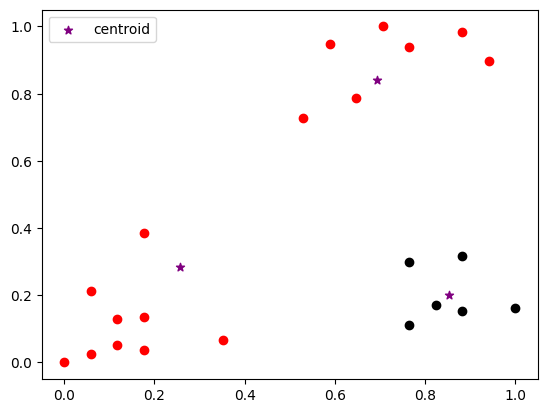

In [78]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# Find Optimal K - Elbow Method

Text(0, 0.5, 'Sum of squared error')

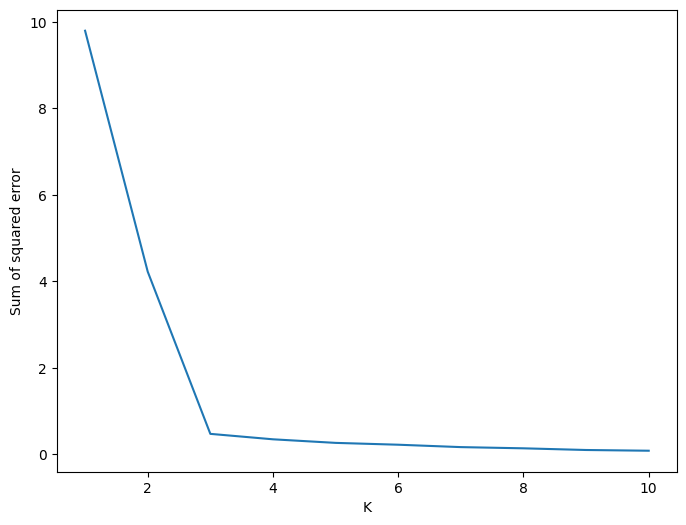

In [84]:
mse  = []

for k in range(1 , 11):
    kmean = KMeans(n_clusters=k)
    kmean.fit(df)
    mse.append(kmean.inertia_)

plt.figure(figsize=(8, 6))
plt.plot( range(1 , 11) , mse )
plt.xlabel('K')
plt.ylabel('Sum of squared error')
    